In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup

In [10]:
url = 'https://kauno.diena.lt/'

page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')
# print(bs)

In [11]:
straipsniai = bs.find_all('div', {'class':'category-block-row grid-12 alpha omega unscore'})
print(len(straipsniai))

41


In [14]:
pavadinimai, nuorodos = [], []
for s in straipsniai:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        print('::REM::')
        print(t)
        print('HREF?')
        print(t['href'])
        print(t.text)
        pavadinimai.append(t.text)
        nuorodos.append(t['href'])

::REM::
<a class="articles-list-title" href="naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">V. Matijošaitis: miestas nesustojo tik pačių kauniečių dėka</a>
HREF?
naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275
V. Matijošaitis: miestas nesustojo tik pačių kauniečių dėka
::REM::
<a class="articles-list-title" href="naujienos/kaunas/miesto-pulsas/sirdi-glostanti-eile-kaunieciai-nori-speti-anksto-balsuoti-seimo-rinkimuose-1195301" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">Širdį glostanti eilė: kauniečiai nori spėti iš anksto balsuoti Seimo rinkimuose</a>
HREF?
naujienos/kaunas/miesto-pulsas/sirdi-glostanti-eile-kaunieciai-nori-speti-anksto-balsuoti-seimo-rinkimuose-1195301
Širdį glostanti eilė: kauniečiai nori spėti iš anksto balsuoti Seimo rinkimuose
::REM::
<a class="articles-l

In [16]:
print(len(pavadinimai))
print(len(nuorodos))

29
29


In [24]:
zodziai=0
zodziukiekiai=[]
for p in pavadinimai:
    zodziai=zodziai + len(p.split())
    zodziukiekiai.append(len(p.split()))
    
print('vidutinis žodžių kiekis straipsnio pavadinime', round(zodziai/len(pavadinimai),2))
print(zodziukiekiai)

vidutinis žodžių kiekis straipsnio pavadinime 9.28
[8, 11, 13, 5, 6, 8, 8, 9, 5, 13, 10, 12, 13, 5, 10, 11, 10, 10, 8, 9, 10, 5, 10, 13, 11, 13, 7, 8, 8]


In [34]:
zodziuzodynas={}
for k in zodziukiekiai:
    if k in zodziuzodynas:
        zodziuzodynas[k] += 1
    else:
        zodziuzodynas[k] = 1

zodziuzodynas = {key: zodziuzodynas[key] for key in sorted(zodziuzodynas)}
print(zodziuzodynas)

{5: 4, 6: 1, 7: 1, 8: 6, 9: 2, 10: 6, 11: 3, 12: 1, 13: 5}


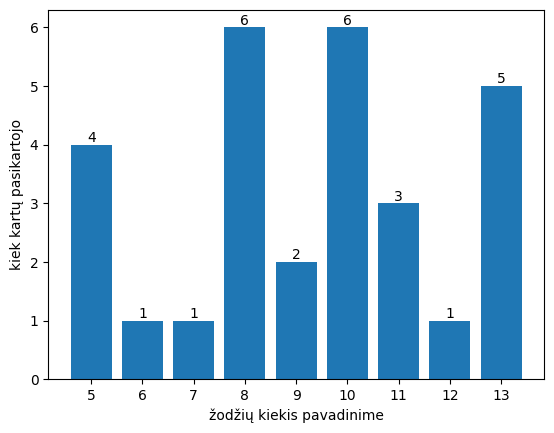

In [40]:
fig, axis = plt.subplots()

a=axis.bar(zodziuzodynas.keys(), zodziuzodynas.values())
axis.bar_label(a)
axis.set_xticks(list(zodziuzodynas.keys()))
axis.set_xlabel('žodžių kiekis pavadinime')
axis.set_ylabel('kiek kartų pasikartojo')
plt.show()

In [49]:
ilgiausias=0
for i in range(0, len(zodziukiekiai)):
    if zodziukiekiai[i] > ilgiausias:
        ilgiausias = i

print(ilgiausias)
print(pavadinimai[ilgiausias])
print(nuorodos[ilgiausias])

23
Dėl advokato mirties sukrėsti kolegos: norėtume žinoti, ar pareigūnai tinkamai vykdė savo misiją
naujienos/vilnius/nusikaltimai-ir-nelaimes/del-advokato-mirties-sukresti-kolegos-noretume-zinoti-ar-pareigunai-tinkamai-vykde-savo-misija-1195286


In [76]:
url = "https://kauno.diena.lt/"+nuorodos[ilgiausias]


page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

straipsniai = bs.find('span', {'itemprop':'articleBody'})
print(len(straipsniai))


23


In [77]:
straip=straipsniai.text
straip=straip.split()


In [69]:
zodziaistraip={}

for k in straip:
    if k in zodziaistraip:
        zodziaistraip[k] += 1
    else:
        zodziaistraip[k] = 1

zodziaistraip = dict(sorted(zodziaistraip.items(), key=lambda item: item[1], reverse=True))
zodziaistraip5=dict(list(zodziaistraip.items())[:5])
print(zodziaistraip5)

{'buvo': 8, 'ir': 7, 'kad': 7, 'policijos': 6, 'advokatas': 5}


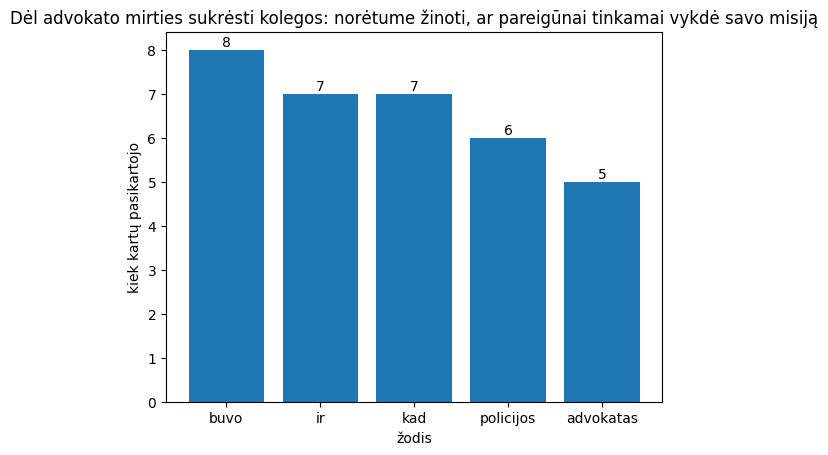

In [71]:
fig, axis = plt.subplots()

a=axis.bar(zodziaistraip5.keys(), zodziaistraip5.values())
axis.bar_label(a)
axis.set_xticks(list(zodziaistraip5.keys()))
axis.set_xlabel('žodis')
axis.set_ylabel('kiek kartų pasikartojo')
plt.title(pavadinimai[ilgiausias])
plt.show()

In [101]:
visozodziu=0
failas=0
for nuor in nuorodos:
    url = "https://kauno.diena.lt/"+nuor
    page = requests.get(url)
    source = page.content
    bs = BeautifulSoup(source, 'html.parser')
    straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
    
    if straipsniai:
        straip=straipsniai[0].text
        straip=straip.split()
    
        visozodziu=visozodziu + len(straip)
    else:
        print(url)
        failas=failas+1
    

print(visozodziu/(len(nuorodos)-1))


https://kauno.diena.lt/https://www.diena.lt/naujienos/vilnius/miesto-pulsas/avulis-apie-nacionalinio-stadiono-projekta-reikia-dar-truputelio-kantrybes-1195289
387.0357142857143


In [102]:
print(type(straipsniai))

<class 'bs4.element.ResultSet'>
